<a href="https://colab.research.google.com/github/angemoreno/Diplomado/blob/main/Transfusion_de_sangre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entregable Modulo 3**

A lo largo del tiempo la donación de sangre ha sido un regalo para muchas personas que lo necesitan para sus vidas, por lo que predecir el suministro de sangre es un problema grave y recurrente para los administradores de recolección de sangre.

El aprendizaje automático supervisado nos ayuda a aprender los patrones en los datos y así hacer predicciones futuras en la donación de sangre y, por lo tanto, salvar más vidas.

Tu tarea será realizar un análisis exploratorio de las variables predictoras según la variable objetivo, que es si la persona donó o no sangre y además predecir (al menos entrenar tres modelos diferentes) si un donante de sangre donará dentro de un período de tiempo determinado:



1.   Cargar los datos de transfusión en Google Colab y mostrar los 5 primeros
individuos.
2.   Imprimir un resumen de la información de los datos. Además, cambiar el
nombre de la variable objetivo.
3.   De la variable objetivo (0 es donará y 1 no donará), realizar un diagrama de barras para ver la distribución de la variable objetivo.
4.   Realizar diagramas de cajas y bigotes de recencia (recency), frecuencia (frecuency), monetaria (monetary), tiempo (times), según la donación.
5.   Seleccionar el conjunto de entrenamiento (75%) y el conjunto de prueba
(25%). Además, mortrar los 5 primeros individuos del conjunto de
entrenamiento.
6.   Entrenar al menos 3 modelos clasificatorios diferentes y calcular sus
respectivas métricas.
7.   Escoger el mejor modelo de clasificación según las métricas vistas, y
argumentar la elección.
8.   Identificar los puntos a favor y en contra de las otras alternativas planteadas,
pero no seleccionadas.




In [ ]:
#Importo las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
#Para cargar el documento desde drive y cargo los datos de transfusión que se encuentra en la carpeta de datos de drive
from google.colab import drive
drive.mount('/content/drive')
transfusion = pd.read_csv("/content/drive/MyDrive/datos/transfusion.data")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Cargo los 5 primeros individuos
transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [ ]:
# Imprimo un resumen de la información del conjunto de datos, veo que los 5 datos son numéricos
transfusion_info = transfusion.info()
print(transfusion_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
None


In [ ]:
#También, valido si tengo datos faltantes y encuentro que no hay datos faltantes
transfusion.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [ ]:
# Renombro la variable objetivo por "Donara", esta variable la dejaré como Donara 2007 y para facilidad de uso, también cambiaré el nombre de las otras columnas
transfusion.rename(columns={"whether he/she donated blood in March 2007":"Donara_2007",
                             "Recency (months)":"Recency",
                             "Frequency (times)":"Frequency",
                             "Monetary (c.c. blood)":"Monetary",
                             "Time (months)":"Time",
                            }, inplace=True)

In [ ]:
# Ahora, hago el resumen estadístico del conjunto de datos, pero evitando mostrar la información de la variable objetivo "Donara_2007", ya que esta información es más categorico que numérica
transfusion.drop('Donara_2007',axis=1).describe().round(4)

,Recency,Frequency,Monetary,Time
count,748.0000,748.0000,748.0000,748.0000
mean,9.5067,5.5147,1378.6765,34.2821
std,8.0954,5.8393,1459.8268,24.3767
min,0.0000,1.0000,250.0000,2.0000
25%,2.7500,2.0000,500.0000,16.0000
50%,7.0000,4.0000,1000.0000,28.0000
75%,14.0000,7.0000,1750.0000,50.0000
max,74.0000,50.0000,12500.0000,98.0000


In [ ]:
#Calculo la varianza
transfusion.var().round(2)

Recency             65.54
Frequency           34.10
Monetary       2131094.23
Time               594.22
Donara_2007          0.18
dtype: float64

<Axes: xlabel='Donara_2007', ylabel='count'>

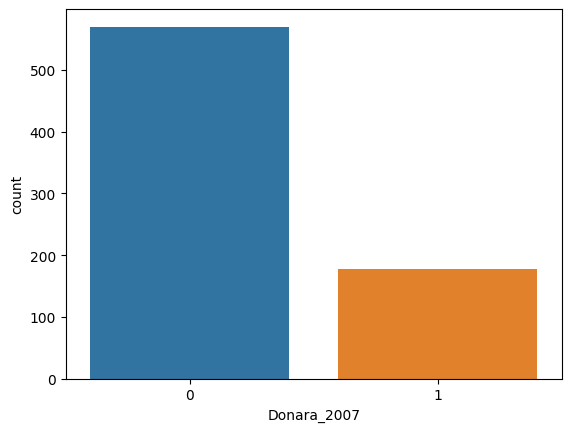

In [ ]:
# Realizo el diagrama de barras con la variable objetivo.
sns.countplot(x = "Donara_2007", data = transfusion)

In [ ]:
# Valido esto con las proporciones de incidencia de la variable objetivo "Donara_2007".
transfusion.Donara_2007.value_counts(normalize=True).round(2) #Redondeo a 2 cifras decimales

0    0.76
1    0.24
Name: Donara_2007, dtype: float64

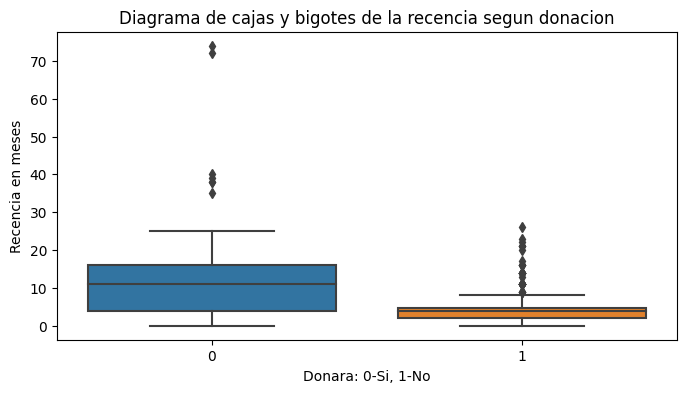

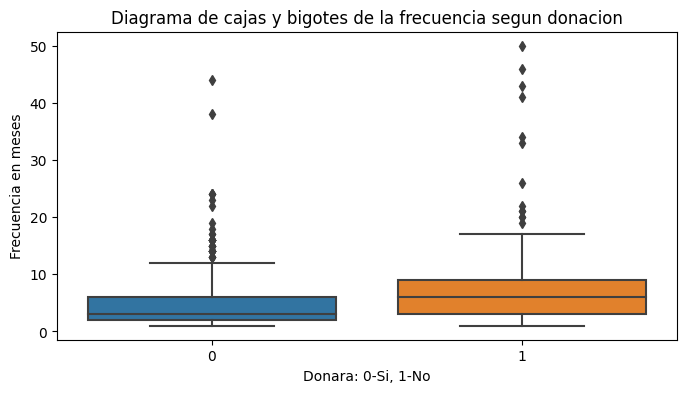

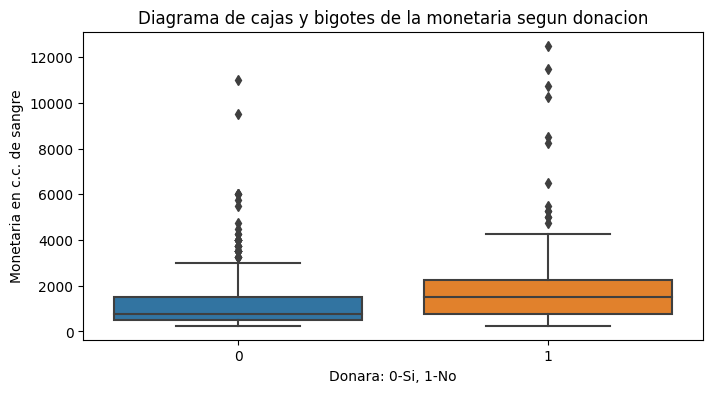

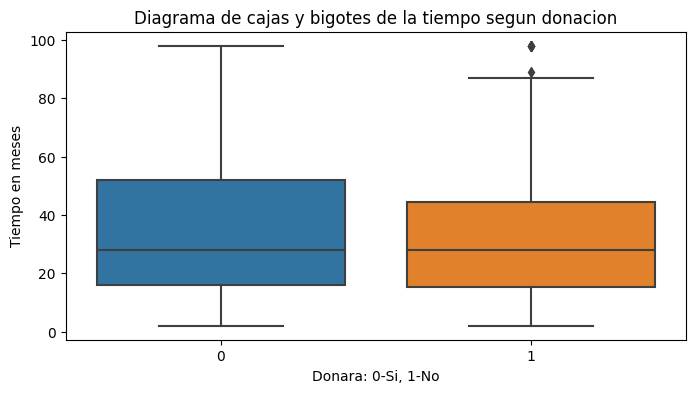

In [ ]:
#Diagrama de cajas y bigotes, esto me permite encontrar las diferencias significativa entre Donacion_2007 y Recency
sns.boxplot(data = transfusion, y = "Recency", x = "Donara_2007")

plt.ylabel("Recencia en meses")
plt.xlabel("Donara: 0-Si, 1-No")
plt.title("Diagrama de cajas y bigotes de la recencia segun donacion")

#Ajustar el tamaño de la grafica
plt.gcf().set_size_inches(8,4)
plt.show()

#Diagrama de cajas y bigotes, esto me permite encontrar las diferencias significativa entre Donacion_2007 y Frequency
sns.boxplot(data = transfusion, y = "Frequency", x = "Donara_2007")

plt.ylabel("Frecuencia en meses")
plt.xlabel("Donara: 0-Si, 1-No")
plt.title("Diagrama de cajas y bigotes de la frecuencia segun donacion")

#Ajustar el tamaño de la grafica
plt.gcf().set_size_inches(8,4)
plt.show()

#Diagrama de cajas y bigotes, esto me permite encontrar las diferencias significativa entre Donacion_2007 y Monetary
sns.boxplot(data = transfusion, y = "Monetary", x = "Donara_2007")

plt.ylabel("Monetaria en c.c. de sangre")
plt.xlabel("Donara: 0-Si, 1-No")
plt.title("Diagrama de cajas y bigotes de la monetaria segun donacion")

#Ajustar el tamaño de la grafica
plt.gcf().set_size_inches(8,4)
plt.show()

#Diagrama de cajas y bigotes, esto me permite encontrar las diferencias significativa entre Donacion_2007 y Time
sns.boxplot(data = transfusion, y = "Time", x = "Donara_2007")

plt.ylabel("Tiempo en meses")
plt.xlabel("Donara: 0-Si, 1-No")
plt.title("Diagrama de cajas y bigotes de la tiempo segun donacion")

#Ajustar el tamaño de la grafica
plt.gcf().set_size_inches(8,4)
plt.show()

Se observa que hay mayor cantidad de valores atipicos y valores bastante altos en los datos de las personas que no donarán (1) con respecto a recencia, frecuencia , monetaria y tiempo.


# Balanceo de los datos

De el resumen estadistico observo que la varianza está muy elevada, especialmente en "Monetary (c.c. blood)" que es mucho mayor que el promedio.

Además, en el diagrama de barras con los datos categoricos me permiten ver si los datos estan balanceados o no estan balanceados, en este caso hay diferencias en las proporciones de la variable objetivo.

Según la incidencia de la variable objetivo "Donara_2007", el 76% de los datos se encuentran en 0. Se mantendrá la misma estructura en los conjuntos de datos de entrenamiento y prueba, es decir, ambos conjuntos de datos tendrán una incidencia del objetivo del 76% de 0, para esto se especificará el parámetro stratify en la columna Donara_2007.

In [ ]:
# Se divide el dataframe transfusion en X_train, X_test, y_train and y_test datasets, estratificando sobre la variable Donara_2007,
# tengo en cuenta que conjunto de entrenamiento (75%) y conjunto de prueba (25%)

from sklearn.model_selection import train_test_split

#Se crea la variable
X = transfusion.drop(["Donara_2007"],axis = 1).values

#Se crea la etiqueta
y = transfusion["Donara_2007"].values

X_train, X_test, y_train, y_test = train_test_split(
  transfusion.drop(columns="Donara_2007"), #Se descarta la columna Donara_2007
  transfusion.Donara_2007,
  test_size=0.25,
  random_state=42,
  stratify=transfusion.Donara_2007
)
#Calculo la varianza y veo que
X_train.var().round(2)


Recency           66.93
Frequency         33.83
Monetary     2114363.70
Time             611.15
dtype: float64

Ya que la varianza de Monetary es muy alta, podrían existir sesgos con esta variable sobre otras, por lo que se realizará la normalización logarítmica.

In [ ]:
# Primero, se copiará X_train y X_test sobre X_train_normed y X_test_normed
X_train_normed, X_test_normed = X_train.copy(), X_test.copy()

# especificar la columna a normalizar
col_to_normalize = "Monetary"

# Log normalización
for df_ in [X_train_normed,X_test_normed]:
    # adiciona la columna log normalizada
    df_["Monetary_log"] = np.log(df_[col_to_normalize])
    # elimina la columna original
    df_.drop(columns=col_to_normalize,inplace =True)

In [ ]:
# Chequea la varianza para X_train_normed
X_train_normed.var().round(3)

Recency          66.929
Frequency        33.830
Time            611.147
Monetary_log      0.837
dtype: float64

In [ ]:
# Chequea la varianza para X_test_normed
X_test_normed.var().round(3)

Recency          61.692
Frequency        34.887
Time            533.939
Monetary_log      0.828
dtype: float64

In [ ]:
X_train_normed.head()

,Recency,Frequency,Time,Monetary_log
334,16,2,16,6.214608
99,5,7,26,7.467371
116,2,7,46,7.467371
661,16,2,16,6.214608
154,2,1,2,5.521461


Al evaluar la varianza despues de normalizar logaritmicamente, se observa que esta cambiado siento Time el que mayor varianza tiene, sin ser un valor muy elevado en comparación con el resto de las variables. Ahora, se continuará con el entrenamiento de modelos.

# Regresion logistica

Rendimiento del conjunto de entrenamiento:  77.54010695187165
Rendimiento del conjunto de prueba:  77.54010695187165

AUC score: 78.90178003814367


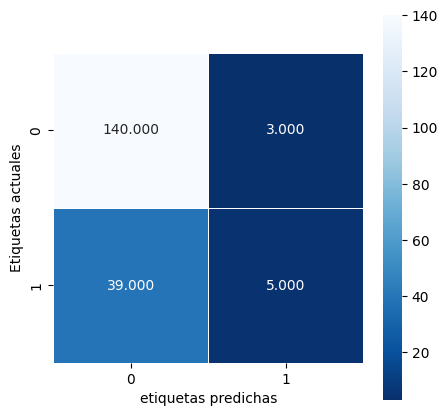

In [ ]:
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
import sklearn


logreg = linear_model.LogisticRegression(solver = 'liblinear', random_state=42)

logreg.fit(X_train_normed,y_train)

y_pred_lr = logreg.predict(X_test_normed)
prediction_train = logreg.predict(X_train_normed)
prediction_proba_lr = logreg.predict_proba(X_test_normed)[:,1]


logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test_normed)[:,1])

cm = metrics.confusion_matrix(y_test,y_pred_lr)

print("Rendimiento del conjunto de entrenamiento: ", logreg.score(X_train_normed,y_train)*100)
print("Rendimiento del conjunto de prueba: ", logreg.score(X_test_normed,y_test)*100)
print(f"\nAUC score: {roc_auc_score(y_test,prediction_proba_lr)*100}")

#Matriz de confusión
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot = True, fmt = ".3f", linewidths=.5, square= True, cmap = "Blues_r");
plt.ylabel("Etiquetas actuales"); # eje y, las reales
plt.xlabel("etiquetas predichas"); #eje x, las de prediccion


De la matriz de confusión se puede evaluar que:
*   El clasificador hizo un total de 187 predicciones
*   De esos 187 casos, el clasificador predijo "sí" 44 veces y "no" 143 veces.
*   En realidad, 44 donantes de la muestra volverían a donar en el 2007 y 143 donantes no.


# K-Vecinos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors = 2)

knn.fit(X_train_normed, y_train) #Se hace el ajuste knn
y_pred_knn = knn.predict(X_test_normed) #Se calcula la matriz de predicción


print("Rendimiento del conjunto de entrenamiento: ", knn.score(X_train_normed,y_train)*100)
print("Rendimiento del conjunto de prueba: ", knn.score(X_test_normed,y_test)*100)


Rendimiento del conjunto de entrenamiento:  82.88770053475936
Rendimiento del conjunto de prueba:  75.40106951871658


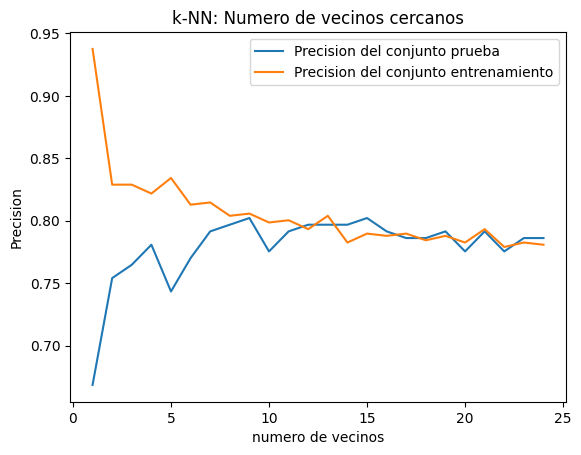

In [ ]:
# Se almacenan las precisiones de entrenamiento y prueba

vecinos = np.arange(1, 25) #Se toma desde el vecino 1 hasta el vecino 25
prec_entrenamiento = np.empty(len(vecinos)) #el conjunto de entrenamiento vacío
prec_prueba = np.empty(len(vecinos)) #el conjunto de prueba vacío

#ciclo sobre diferentes vecinos cercanos
for i, k in enumerate(vecinos):
  #Clasificador kNN con k vecinos cercanos: knn
  knn = KNeighborsClassifier(n_neighbors = k) #primero se llama a la instancia segun el conteo que llevamos, en este caso del vecino K

  #Ajuste del clasificador al conjunto de datos de entrenamiento
  knn.fit(X_train_normed, y_train) # se hace el ajunte

  #Calculo de la precision en el conj de entrenamiento
  prec_entrenamiento[i] = knn.score(X_train_normed, y_train) #almacenamos el ajuste del conjunto de entrenamiento

  #Calculo de la precision en el conj de prueba
  prec_prueba[i] = knn.score(X_test_normed, y_test) #almacenamos el ajuste del conjunto de prueba

#Generate plot
plt.title("k-NN: Numero de vecinos cercanos")
plt.plot(vecinos, prec_prueba, label = "Precision del conjunto prueba")
plt.plot(vecinos, prec_entrenamiento, label = "Precision del conjunto entrenamiento")
plt.legend()
plt.xlabel("numero de vecinos")
plt.ylabel("Precision")
plt.show()

#Con el grafico puedo ver que al inicion hay un sobreajuste y luego un subajuste, por lo que los vecinos mas adecuados o mas optimoses el vecino 9, que es el que se usa para entrenar.

Rendimiento del conjunto de entrenamiento:  77.89661319073083
Rendimiento del conjunto de prueba:  77.54010695187165


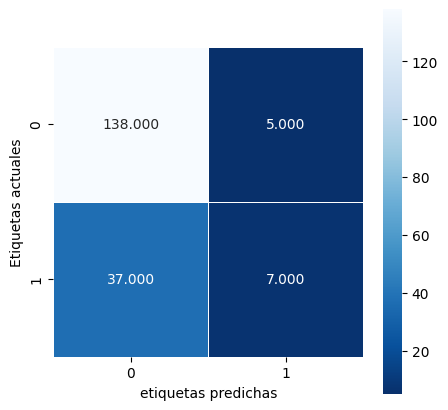

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 22)

knn.fit(X_train_normed, y_train) #Se hace el ajuste knn
y_pred_knn = knn.predict(X_test_normed) #Se calcula la matriz de predicción

cm = metrics.confusion_matrix(y_test,y_pred_knn)

print("Rendimiento del conjunto de entrenamiento: ", knn.score(X_train_normed,y_train)*100)
print("Rendimiento del conjunto de prueba: ", knn.score(X_test_normed,y_test)*100)

#Matriz de confusion
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot = True, fmt = ".3f", linewidths=.5, square= True, cmap = "Blues_r");
plt.ylabel("Etiquetas actuales"); # eje y, las reales
plt.xlabel("etiquetas predichas"); #eje x, las de prediccion

De la matriz de confusión se puede evaluar que:
*   El clasificador hizo un total de 187 predicciones
*   De esos 187 casos, el clasificador predijo "sí" 44 veces y "no" 143 veces.
*   En realidad, 44 donantes de la muestra volverían a donar en el 2007 y 143 donantes no.

Usando el vecino 9 y vemos como el rendimiento del conjunto prueba mejora pasando de 75.40 a 80.21. Aunque el conjunto entrenamiento cambia, de

# Árbol de decisión

 Primero encontraremos el PCA, para determinar en qué medida podemos reducir la dimensionalidad de nuestros datos. Podemos usar gráficos de pantalla para encontrar el número de componentes a utilizar en análisis posteriores, para esto se utiliza una "curva" (una caída abrupta de un punto de datos al siguiente) en el gráfico para decidir sobre un corte adecuado.

Text(0.5, 0, 'Componente principal')

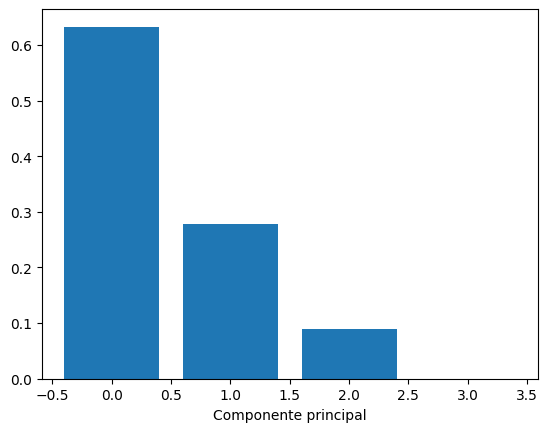

In [ ]:
#Primero debo calcular el PCA para esto se importa StandardScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Escalar las variables y establecer los valores en una nueva variabl
scaler = StandardScaler()

# Escalar X_train y X_test
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

# Esto es solo para que los gráficos aparezcan en el notebook.
%matplotlib inline

# Obtener nuestros ratios de varianza explicada de PCA utilizando todas las características.
pca = PCA()
pca.fit(scaled_X_train)
exp_variance = pca.explained_variance_ratio_

# Graficar la varianza explicada utilizando un gráfico de barras.
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_),exp_variance)
ax.set_xlabel("Componente principal")

Ya que no se ve esta curva, buscaremos el PCA por gráficos de ratio explicado acumulativo.

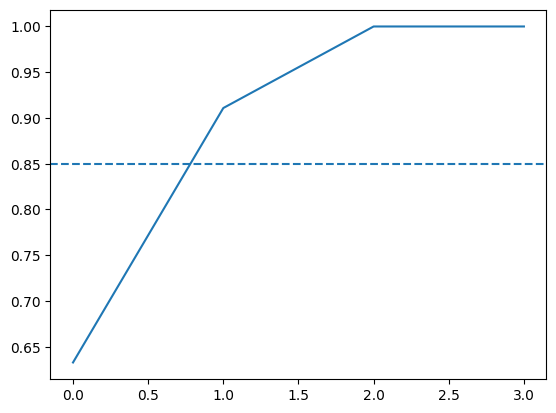

In [ ]:
# Calcular la varianza explicada acumulada
cum_exp_variance = np.cumsum(exp_variance)

# Graficar la varianza explicada acumulada y dibujar una línea punteada en 0.85.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85,linestyle = "--")

Se ve en el grafico que 2 caracteristicas pueden explicar el 85% de la varianza, por lo que podemos usar 2 componentes para realizar PCA y reducir la dimensionalidad de las caracteristicas de entrenamiento y prueba

In [ ]:
# Realizar PCA con el número de componentes elegido y proyectar los datos en los componentes.
pca = PCA(n_components = 2, random_state = 10)

# Ajustar y transformar las características de entrenamiento escaladas utilizando pca.
train_pca = pca.fit_transform(scaled_X_train)

# Ajuste y transforme las características de prueba escaladas utilizando PCA.
test_pca = pca.transform(scaled_X_test)

Ahora podemos utilizar la proyección de PCA de menor dimensionalidad de los datos para clasificar la desición de los donantes en 2007

Rendimiento del conjunto de entrenamiento:  94.11764705882352
Rendimiento del conjunto de prueba:  72.19251336898395

AUC score: 61.36363636363637


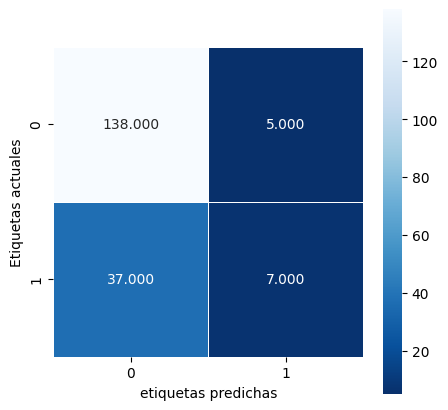

In [ ]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

tree = DecisionTreeClassifier()
tree.fit(train_pca, y_train) #Ajuste para el conjunto de entrenamiento
tree_pred = tree.predict(test_pca) #Prediccion para el conjunto de prueba

cm_tree = metrics.confusion_matrix(y_test, tree_pred)


print("Rendimiento del conjunto de entrenamiento: ", tree.score(train_pca,y_train)*100)
print("Rendimiento del conjunto de prueba: ", tree.score(test_pca,y_test)*100)
print(f"\nAUC score: {roc_auc_score(y_test,tree_pred)*100}")

#Matriz de confusion
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot = True, fmt = ".3f", linewidths=.5, square= True, cmap = "Blues_r");
plt.ylabel("Etiquetas actuales"); # eje y, las reales
plt.xlabel("etiquetas predichas"); #eje x, las de prediccion


De la matriz de confusión se puede evaluar que:
*   El clasificador hizo un total de 187 predicciones
*   De esos 187 casos, el clasificador predijo "sí" 44 veces y "no" 143 veces.
*   En realidad, 44 donantes de la muestra volverían a donar en el 2007 y 143 donantes no.

# Se realiza el reporte de clasificación

In [ ]:
# Entrenar nuestra regresión logística en los datos balanceados.
logreg = LogisticRegression(random_state=10)
logreg.fit(train_pca,y_train)
pred_logit = logreg.predict(test_pca)

# Entrenar nuestra k-vecinos en los datos balanceados.
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(train_pca,y_train)
pred_knn = knn.predict(test_pca)

# Entrenar nuestro árbol de decisión en los datos balanceados.
tree = DecisionTreeClassifier(random_state = 10)
tree.fit(train_pca,y_train)
pred_tree = tree.predict(test_pca)

# Comparar los modelos
print("Regresión logística: \n", classification_report(y_test,pred_logit))
print("K-vecinos: \n", classification_report(y_test,pred_knn))
print("Árbol de decisión: \n", classification_report(y_test,pred_tree))

Regresión logística: 
               precision    recall  f1-score   support

           0       0.78      0.99      0.87       143
           1       0.80      0.09      0.16        44

    accuracy                           0.78       187
   macro avg       0.79      0.54      0.52       187
weighted avg       0.78      0.78      0.71       187

K-vecinos: 
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       143
           1       0.60      0.27      0.37        44

    accuracy                           0.79       187
   macro avg       0.70      0.61      0.62       187
weighted avg       0.76      0.79      0.75       187

Árbol de decisión: 
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       143
           1       0.40      0.39      0.39        44

    accuracy                           0.72       187
   macro avg       0.60      0.60      0.60       187
weighted avg     

Se puede observar que el modelo que tiene mejor precisión es la Regresión logística ya que la precisión está más balanceada en comparación a los otros modelos.

# Usando la validación cruzada para evaluar nuestros modelos

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import sklearn

logreg_pipe = Pipeline([("scaler", StandardScaler()),("pca", PCA(n_components=2)),("logreg",LogisticRegression(random_state=10))])
knn_pipe = Pipeline([("scaler", StandardScaler()),("pca", PCA(n_components=2)),("knn",KNeighborsClassifier(n_neighbors=20))])
tree_pipe = Pipeline([("scaler", StandardScaler()),("pca", PCA(n_components=2)),("tree",DecisionTreeClassifier(random_state=10))])

# Configurar nuestra validación cruzada K-fold.
kf = KFold(10)

# Entrenar nuestros modelos utilizando KFold CV.
logit_score = cross_val_score(logreg_pipe, X, y, cv=kf)
knn_score = cross_val_score(knn_pipe, X, y, cv=kf)
tree_score = cross_val_score(tree_pipe, X, y, cv=kf)


# Imprime el promedio de cada array de puntajes.
print("Logistic Regression:", np.mean(logit_score), "K-Vecinos:", np.mean(knn_score), "Decision Tree:", np.mean(tree_score))

Logistic Regression: 0.7744144144144144 K-Vecinos: 0.7677477477477478 Decision Tree: 0.6996036036036035


# Elección del modelo

Se selecciona el modelo de Regresión Logistica ya que aunque es el que menor valor da en el rendimiento del conjunto de **entrenamiento (77.54%)** y **prueba (77.54%)**, es el modelo que se muetra más balanceado en la variable objetivo y tiene una **exactitud de 0.78**, la cual es buena comparada con los otros modelos. Y finalmente, al hacer el cross-validation media se puede concluir que el modelo es alrededor del 77.4% de precision en promedio.

# Comparación
*   El modelo de **k-vecinos** tiene un rendimiento del conjunto de **entrenamiento (77.89%)**  y  **prueba (77.54%)** similar al del modelo de Regresión Logistica y **exactitud de 0.79**, al validar la precisión se ve un desbalance en la variable objetivo.
*   En el modelo **árbol de decisión** se observa que el rendimiento del conjunto de **entrenamiento (94.11%)**  y  **prueba (71.45%)** es mayor que en los otros modelos, sin embargo, la **exactitud en comparación es menor (0.72)** y el desbalance en la variable objetivo también es un factor de descarte.